# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: 


**Prompt:**

> Describe the IMDB dataset.

Response:

GitHub Copilot: The IMDB dataset is a large dataset of movie reviews for natural language processing. It contains 50,000 movie reviews, split evenly into 25,000 reviews for training and 25,000 reviews for testing. Each review is labeled as either positive or negative. The dataset is often used for sentiment analysis and text classification tasks.

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [1]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# num_words=10000 means we'll only keep the top 10,000 most frequently occurring words in the training data

2023-10-12 16:13:09.215437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


17464789/17464789 [==============================] - 0s 0us/step


You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

> what is the form of the training data?

> what are the words used in the training data?



Answer 1: GitHub Copilot: The labels for the IMDB dataset are binary, either 0 or 1, where 0 is a negative review and 1 is a positive review.

Answer 2: GitHub Copilot: The training data in the IMDB dataset is in the form of a list of integers, where each integer represents a word in a movie review. The integers are encoded such that each integer corresponds to a specific word in a dictionary of the 10,000 most frequently occurring words in the training data. The labels for the training data are also in the form of a list of integers, where each integer is either 0 or 1, representing a negative or positive review, respectively.

Answer 3: GitHub Copilot: To get the words used in the training data, we need to map the integer-encoded words back to the original words. Below's the code to do that:

Note that the dataset is already processed, so the records are lists of integers.

In [2]:
# Load the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first review in the training data
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Print the decoded review
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?

Answer: GitHub Copilot: One way to visualize the word index is to create a word cloud. A word cloud is a visual representation of text data, where the size of each word represents its frequency in the text. We can create a word cloud of the word index by first converting it to a dictionary where the keys are the words and the values are the integer-encoded values, and then using a word cloud library to generate the visualization.

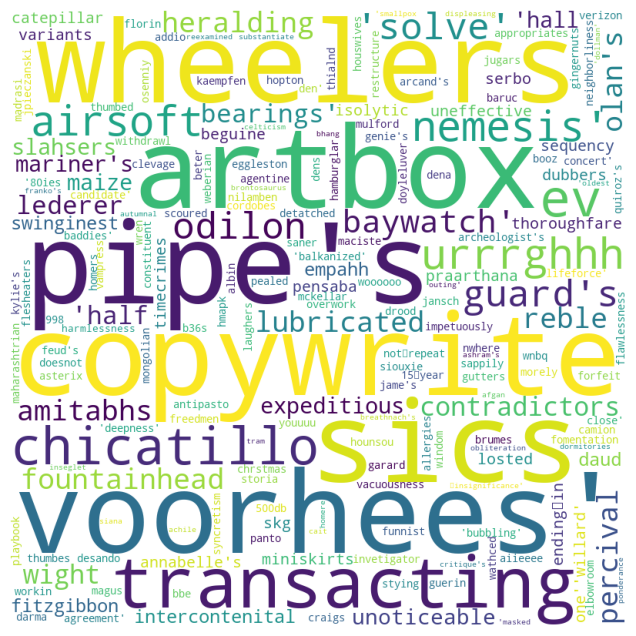

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Create a dictionary of words and their frequencies
word_freq = {reverse_word_index[i]:i for i in range(1, len(reverse_word_index))}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

Answer: GitHub Copilot: To create a word cloud from the word index where the font size is proportional to the number of occurrences of the word, you can use the `WordCloud` library in Python. Here's an example code snippet to create a word cloud from the word index:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Create a dictionary of words and their frequencies
word_freq = {reverse_word_index[i]:i for i in range(1, len(reverse_word_index))}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, max_font_size=150).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In this example, we first load the word index dictionary and reverse it to map integers to words. We then create a dictionary of words and their frequencies by iterating over the word index and counting the number of occurrences of each word. We then use the `WordCloud` library to generate the word cloud, setting the `max_words` parameter to limit the number of words in the cloud and the `max_font_size` parameter to control the maximum font size. Finally, we plot the word cloud using `matplotlib`.

It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the promp:

> download the stop words

In [6]:
import string
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words('english'))

# Load the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first review in the training data
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Remove punctuation and convert to lowercase
review_no_punc = decoded_review.translate(str.maketrans('', '', string.punctuation)).lower()

# Remove stop words
review_no_stop = ' '.join([word for word in review_no_punc.split() if word not in stop_words])

# Print the processed review
print(review_no_stop)

film brilliant casting location scenery story direction everyones really suited part played could imagine robert amazing actor director father came scottish island loved fact real connection film witty remarks throughout film great brilliant much bought film soon released would recommend everyone watch fly fishing amazing really cried end sad know say cry film must good definitely also two little boys played norman paul brilliant children often left list think stars play grown big profile whole film children amazing praised done dont think whole story lovely true someones life shared us


> now created a word cloud from the filtered words

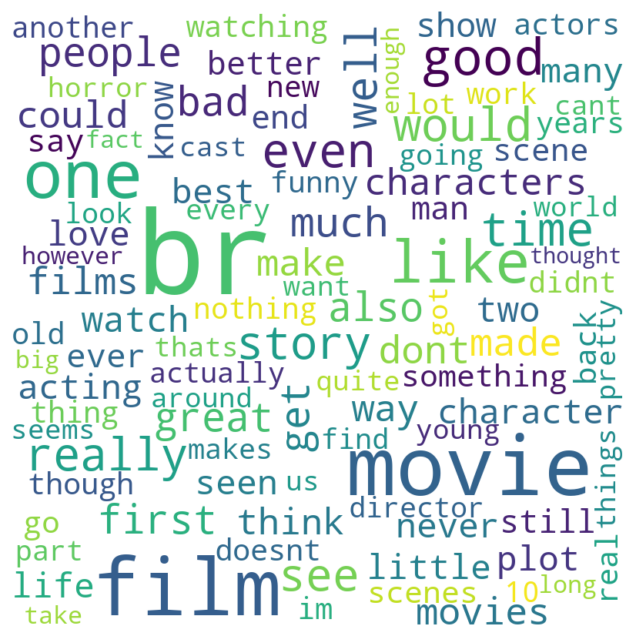

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Create a dictionary of words and their frequencies
word_freq = {}
for i in range(len(train_data)):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])
    review_no_punc = decoded_review.translate(str.maketrans('', '', string.punctuation)).lower()
    review_no_stop = ' '.join([word for word in review_no_punc.split() if word not in stop_words])
    for word in review_no_stop.split():
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, max_font_size=150).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Prepare the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Define the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
results = model.evaluate(x_test, y_test)
print(results)

2023-10-12 16:40:21.072381: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 32. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
49/49 [==============================] - 6s 107ms/step - loss: 0.4467 - accuracy: 0.8281 - val_loss: 0.3480 - val_accuracy: 0.8774
Epoch 2/10
49/49 [==============================] - 1s 30ms/step - loss: 0.2823 - accuracy: 0.9040 - val_loss: 0.2999 - val_accuracy: 0.8846
Epoch 3/10
49/49 [==============================] - 1s 22ms/step - loss: 0.2303 - accuracy: 0.9184 - val_loss: 0.2844 - val_accuracy: 0.8883
Epoch 4/10
49/49 [==============================] - 1s 22ms/step - loss: 0.1999 - accuracy: 0.9297 - val_loss: 0.2777 - val_accuracy: 0.8890
Epoch 5/10
49/49 [==============================] - 1s 23ms/step - loss: 0.1797 - accuracy: 0.9369 - val_loss: 0.2802 - val_accuracy: 0.8872
Epoch 6/10
49/49 [==============================] - 1s 23ms/step - loss: 0.1649 - accuracy: 0.9444 - val_loss: 0.2927 - val_accuracy: 0.8825
Epoch 7/10
49/49 [==============================] - 1s 24ms/step - loss: 0.1526 - accuracy: 0.9486 - val_loss: 0.3009 - val_accuracy: 0.8806
Epoch 8/10
4

We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain


The code above is an example of how to train a binary classifier for the IMDB dataset using a simple neural network with one hidden layer. The code is written in Python using the Keras API for TensorFlow.

The first step in the code is to load the IMDB dataset using the `load_data` function from Keras. The dataset consists of movie reviews that are labeled as either positive or negative. The `num_words` parameter is set to 10000, which means that only the 10000 most frequently occurring words in the dataset will be used.

Next, the code defines a function called `vectorize_sequences` that converts the integer-encoded sequences of words into a one-hot encoded matrix. The function takes two arguments: `sequences`, which is a list of integer-encoded sequences, and `dimension`, which is the size of the vocabulary. The function creates a matrix of zeros with the same number of rows as `sequences` and `dimension` columns. It then sets the value of each element in the matrix to 1 if the corresponding word is present in the sequence.

The next few lines of code use the `vectorize_sequences` function to preprocess the training and test data. The `train_data` and `test_data` are converted to one-hot encoded matrices using the `vectorize_sequences` function, and the `train_labels` and `test_labels` are converted to numpy arrays of type `float32`.

The code then defines the neural network model using the `Sequential` class from Keras. The model consists of two layers: a dense layer with 16 units and a ReLU activation function, and a dense layer with 1 unit and a sigmoid activation function. The input shape of the first layer is `(10000,)`, which corresponds to the size of the vocabulary.

The model is then compiled using the `compile` method. The optimizer is set to `'rmsprop'`, the loss function is set to `'binary_crossentropy'`, and the metric is set to `'accuracy'`.

The model is trained using the `fit` method. The `x_train` and `y_train` are used as input and output, respectively. The `epochs` parameter is set to 10, which means that the model will be trained for 10 iterations over the entire training dataset. The `batch_size` parameter is set to 512, which means that the model will be updated after every 512 samples. The `validation_data` parameter is set to `(x_test, y_test)`, which means that the model will be evaluated on the test data after every epoch.

Finally, the model is evaluated on the test data using the `evaluate` method. The results are printed to the console, which includes the loss and accuracy of the model on the test data.

## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like

> What is the accuracy of the best-performing model on the IMDB dataset?

> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

Answer:

GitHub Copilot: There are several common deep learning models used for sentiment analysis on the IMDB dataset. Here are a few examples:

1. **Convolutional Neural Networks (CNNs)**: CNNs are commonly used for image classification, but they can also be used for text classification tasks like sentiment analysis. In the context of sentiment analysis, a CNN can be used to extract features from the text by applying convolutional filters to the input sequence. The output of the convolutional layer is then fed into a fully connected layer for classification.

2. **Recurrent Neural Networks (RNNs)**: RNNs are a type of neural network that can process sequences of variable length. In the context of sentiment analysis, an RNN can be used to model the temporal dependencies between words in a sentence. The most common type of RNN used for sentiment analysis is the Long Short-Term Memory (LSTM) network, which is designed to avoid the vanishing gradient problem that can occur in traditional RNNs.

3. **Transformers**: Transformers are a type of neural network architecture that have recently gained popularity for natural language processing tasks like sentiment analysis. Transformers use a self-attention mechanism to process sequences of variable length, allowing them to capture long-range dependencies between words in a sentence. The most well-known transformer architecture is the BERT (Bidirectional Encoder Representations from Transformers) model, which has achieved state-of-the-art performance on several natural language processing tasks.

4. **Ensemble models**: Ensemble models combine the predictions of multiple models to improve performance. In the context of sentiment analysis, an ensemble model can be created by training multiple CNNs, RNNs, or transformers with different hyperparameters or architectures, and then combining their predictions using a voting or averaging scheme.

These are just a few examples of the deep learning models that are commonly used for sentiment analysis on the IMDB dataset. The choice of model depends on the specific requirements of the task, such as the size of the dataset, the complexity of the language used in the reviews, and the desired level of accuracy.

## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Set the maximum number of words to use
max_features = 10000

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad the sequences to a fixed length
maxlen = 200
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model
model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/10


2023-10-12 16:49:20.896995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-12 16:49:20.898770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-12 16:49:20.899813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

156/157 [============================>.] - ETA: 0s - loss: 0.6026 - accuracy: 0.6399

2023-10-12 16:49:35.568247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-12 16:49:35.569544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-12 16:49:35.570956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

157/157 [==============================] - 16s 84ms/step - loss: 0.6024 - accuracy: 0.6402 - val_loss: 0.6002 - val_accuracy: 0.7214
Epoch 2/10
157/157 [==============================] - 13s 81ms/step - loss: 0.3553 - accuracy: 0.8507 - val_loss: 0.4302 - val_accuracy: 0.8068
Epoch 3/10
157/157 [==============================] - 12s 78ms/step - loss: 0.2639 - accuracy: 0.8953 - val_loss: 0.3474 - val_accuracy: 0.8544
Epoch 4/10
157/157 [==============================] - 13s 80ms/step - loss: 0.2094 - accuracy: 0.9212 - val_loss: 0.3825 - val_accuracy: 0.8402
Epoch 5/10
157/157 [==============================] - 13s 81ms/step - loss: 0.1513 - accuracy: 0.9451 - val_loss: 0.3608 - val_accuracy: 0.8676
Epoch 6/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1023 - accuracy: 0.9653 - val_loss: 0.3852 - val_accuracy: 0.8690
Epoch 7/10
157/157 [==============================] - 12s 78ms/step - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.4377 - val_accuracy: 0.8532
Epo

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Set the maximum number of words to use
max_features = 10000

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad the sequences to a fixed length
maxlen = 200
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model
model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/10
157/157 [==============================] - 15s 80ms/step - loss: 0.6636 - accuracy: 0.5646 - val_loss: 0.6406 - val_accuracy: 0.6610
Epoch 2/10
157/157 [==============================] - 12s 78ms/step - loss: 0.3975 - accuracy: 0.8235 - val_loss: 0.4885 - val_accuracy: 0.7674
Epoch 3/10
157/157 [==============================] - 12s 79ms/step - loss: 0.2847 - accuracy: 0.8870 - val_loss: 0.4479 - val_accuracy: 0.8110
Epoch 4/10
157/157 [==============================] - 12s 78ms/step - loss: 0.2252 - accuracy: 0.9146 - val_loss: 0.3504 - val_accuracy: 0.8600
Epoch 5/10
157/157 [==============================] - 12s 77ms/step - loss: 0.1664 - accuracy: 0.9395 - val_loss: 0.4001 - val_accuracy: 0.8506
Epoch 6/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1213 - accuracy: 0.9571 - val_loss: 0.5213 - val_accuracy: 0.8376
Epoch 7/10
157/157 [==============================] - 12s 78ms/step - loss: 0.0786 - accuracy: 0.9730 - val_loss: 0.4903 - val_accuracy: